### 딥러닝


In [17]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불어온다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

import numpy as np
import tensorflow as tf


# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)


# 준비된 수술 환자 데이터를 불러옴
Data_set = np.loadtxt("../ml/datasets/ThoraricSurgery.csv", delimiter=",")



# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:,0:17]
Y = Data_set[:,17]


# 딥러닝 구조를 결정(모델을 설정하고 실행하는 부분)
model = Sequential( )
model.add(Dense(30, input_dim=17, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


# 딥러닝 실행
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
model.fit(X, Y, epochs=100, batch_size=10)


ValueError: could not convert string to float: 'id'

In [14]:
Data_set

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [19]:
import numpy as np

# x 값과 y값
x=[2, 4, 6, 8]
y=[85, 96, 93, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d=0
    for i in range(len(x)):
        d+=(x[i]-mx)*(y[i]-my)
    return d
dividend=top(x,mx,y, my)

print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y절편 구하기
a = dividend/divisor
b=my-(mx*a)

# 출력으로 확인
print("기울기 =", a)
print("y절편= ", b)

x의 평균값: 5.0
y의 평균값: 92.75
분모: 20.0
분자: 33.0
기울기 = 1.65
y절편=  84.5


In [20]:
column=["datetime"]
a=pd.date_range("2021-04-01 09:00:00", "2022-04-26 15:30:00", freq="T")
b=pd.DataFrame(data=a, columns=column)

### 경사 하강법

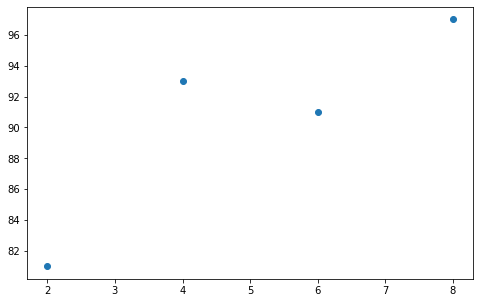

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만든다
data = [[2,81], [4,93], [6, 91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타낸다
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()


In [7]:
# 리스트 되어 있는 X와 y값을 넘파이 배열로 바꾸어 준다. (인덱스를 주어 하나씩 불러와 
# 계산이 가능해 지도록 하기 위함이다.)
x_data = np.array(x)
y_data = np.array(y)

# 기울기  a와 절펴 b의 값을 초기화 한다.
a= 0
b=0

#학습률을 정한다.
lr= 0.03

#몇 번 박복될지를 설정
epochs = 2001

#경사 하강법을 시작한다.
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = a*x_data+b # y를 구하는 식을 세운다.
    error = y_data-y_hat # 오차를 구하는 식
    a_diff = -(2/len(x_data)) * sum(x_data *(error)) #오차함수를 a로 미분한 값
    b_diff = -(2/len(x_data)) * sum(error) # # 오차함수를 b로 미분한 값
    a= a-lr * a_diff # 학습률을 곱해 기존의 a값을 업데이트
    b=b-lr*b_diff # 학습률을 곱해 기존의 b값을 업데이트
    if i % 100 == 0: # 100번 반복될 때마다 현재의 a값, b값을 출력
        print("epoch = %.f, 기울기 = %0.4f, 절편=%.04f" % (i, a,b))
    

epoch = 0, 기울기 = 27.8400, 절편=5.4300
epoch = 100, 기울기 = 7.0739, 절편=50.5117
epoch = 200, 기울기 = 4.0960, 절편=68.2822
epoch = 300, 기울기 = 2.9757, 절편=74.9678
epoch = 400, 기울기 = 2.5542, 절편=77.4830
epoch = 500, 기울기 = 2.3956, 절편=78.4293
epoch = 600, 기울기 = 2.3360, 절편=78.7853
epoch = 700, 기울기 = 2.3135, 절편=78.9192
epoch = 800, 기울기 = 2.3051, 절편=78.9696
epoch = 900, 기울기 = 2.3019, 절편=78.9886
epoch = 1000, 기울기 = 2.3007, 절편=78.9957
epoch = 1100, 기울기 = 2.3003, 절편=78.9984
epoch = 1200, 기울기 = 2.3001, 절편=78.9994
epoch = 1300, 기울기 = 2.3000, 절편=78.9998
epoch = 1400, 기울기 = 2.3000, 절편=78.9999
epoch = 1500, 기울기 = 2.3000, 절편=79.0000
epoch = 1600, 기울기 = 2.3000, 절편=79.0000
epoch = 1700, 기울기 = 2.3000, 절편=79.0000
epoch = 1800, 기울기 = 2.3000, 절편=79.0000
epoch = 1900, 기울기 = 2.3000, 절편=79.0000
epoch = 2000, 기울기 = 2.3000, 절편=79.0000


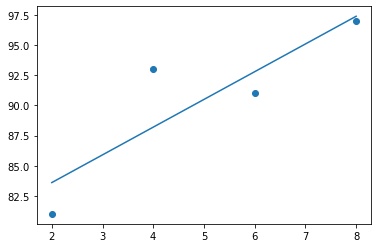

 회귀 그래프식: y = 2.3x + 79


In [16]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
y_pred = a * x_data+b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()
print(" 회귀 그래프식: y = %0.1fx + %.0f" % ( a,b))

### 경사하강법 -오차 수정하기

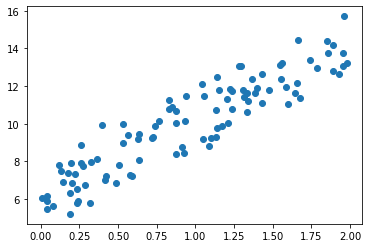

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y= 4x+6 식을 근사(w1=4, w0=6).random 값은 Noise를 위해 만듬
x = 2* np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot 으로 시각화
plt.scatter(x,y)

In [47]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, x, y, learning_rate =0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x, w1.T)+w0
    diff =y-y_pred
    
    # wo_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N)*learning_rate *(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update
    
    

In [48]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(x,w1.T)+w0
diff = y-y_pred
print(diff.shape)
w0_factors  = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(x.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0


(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [49]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(x,y, iters = 10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0업데이트 수행
    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        return w1,w0

In [50]:
# 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:0.215 w0:0.199
Gradient Descent Total Cost:97.2970


In [53]:
def stochastic_gradient_descent_steps(x,y, batch_size =10, iters=1000):
    w0= np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost =10000 
    iter_index  = 0
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 x, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_x, sample_y로 저장
        stochastic_random_index = np.random.permutation(x.shape[0]) # permutation 무작위로 추출
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = x[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
        w1=w1-w1_update
        w0= w0-w0_update
    return w1, w0

w1, w0 - stochastic_gradient_descent_steps(x,y, iters=10000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred =w1[0,0]*x+w0
print('stochastic Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))

        

w1: 0.215 w0: 0.199
stochastic Gradient Descent Total cost:97.2970
